In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blue-book-for-bulldozer/Test.csv
/kaggle/input/blue-book-for-bulldozer/Valid/Valid.csv
/kaggle/input/blue-book-for-bulldozer/Train/Train.csv


# Leitura dos dados

In [5]:
df = pd.read_csv('/kaggle/input/blue-book-for-bulldozer/Train/Train.csv',low_memory=False, parse_dates=['saledate'])

In [6]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(401125, 53)

# Etapa 1: Verificar o tipo dos dados

SalesID                              int64
SalePrice                            int64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

(4999,)

# Etapa 2: Usar a missingno para verificar valores nulos

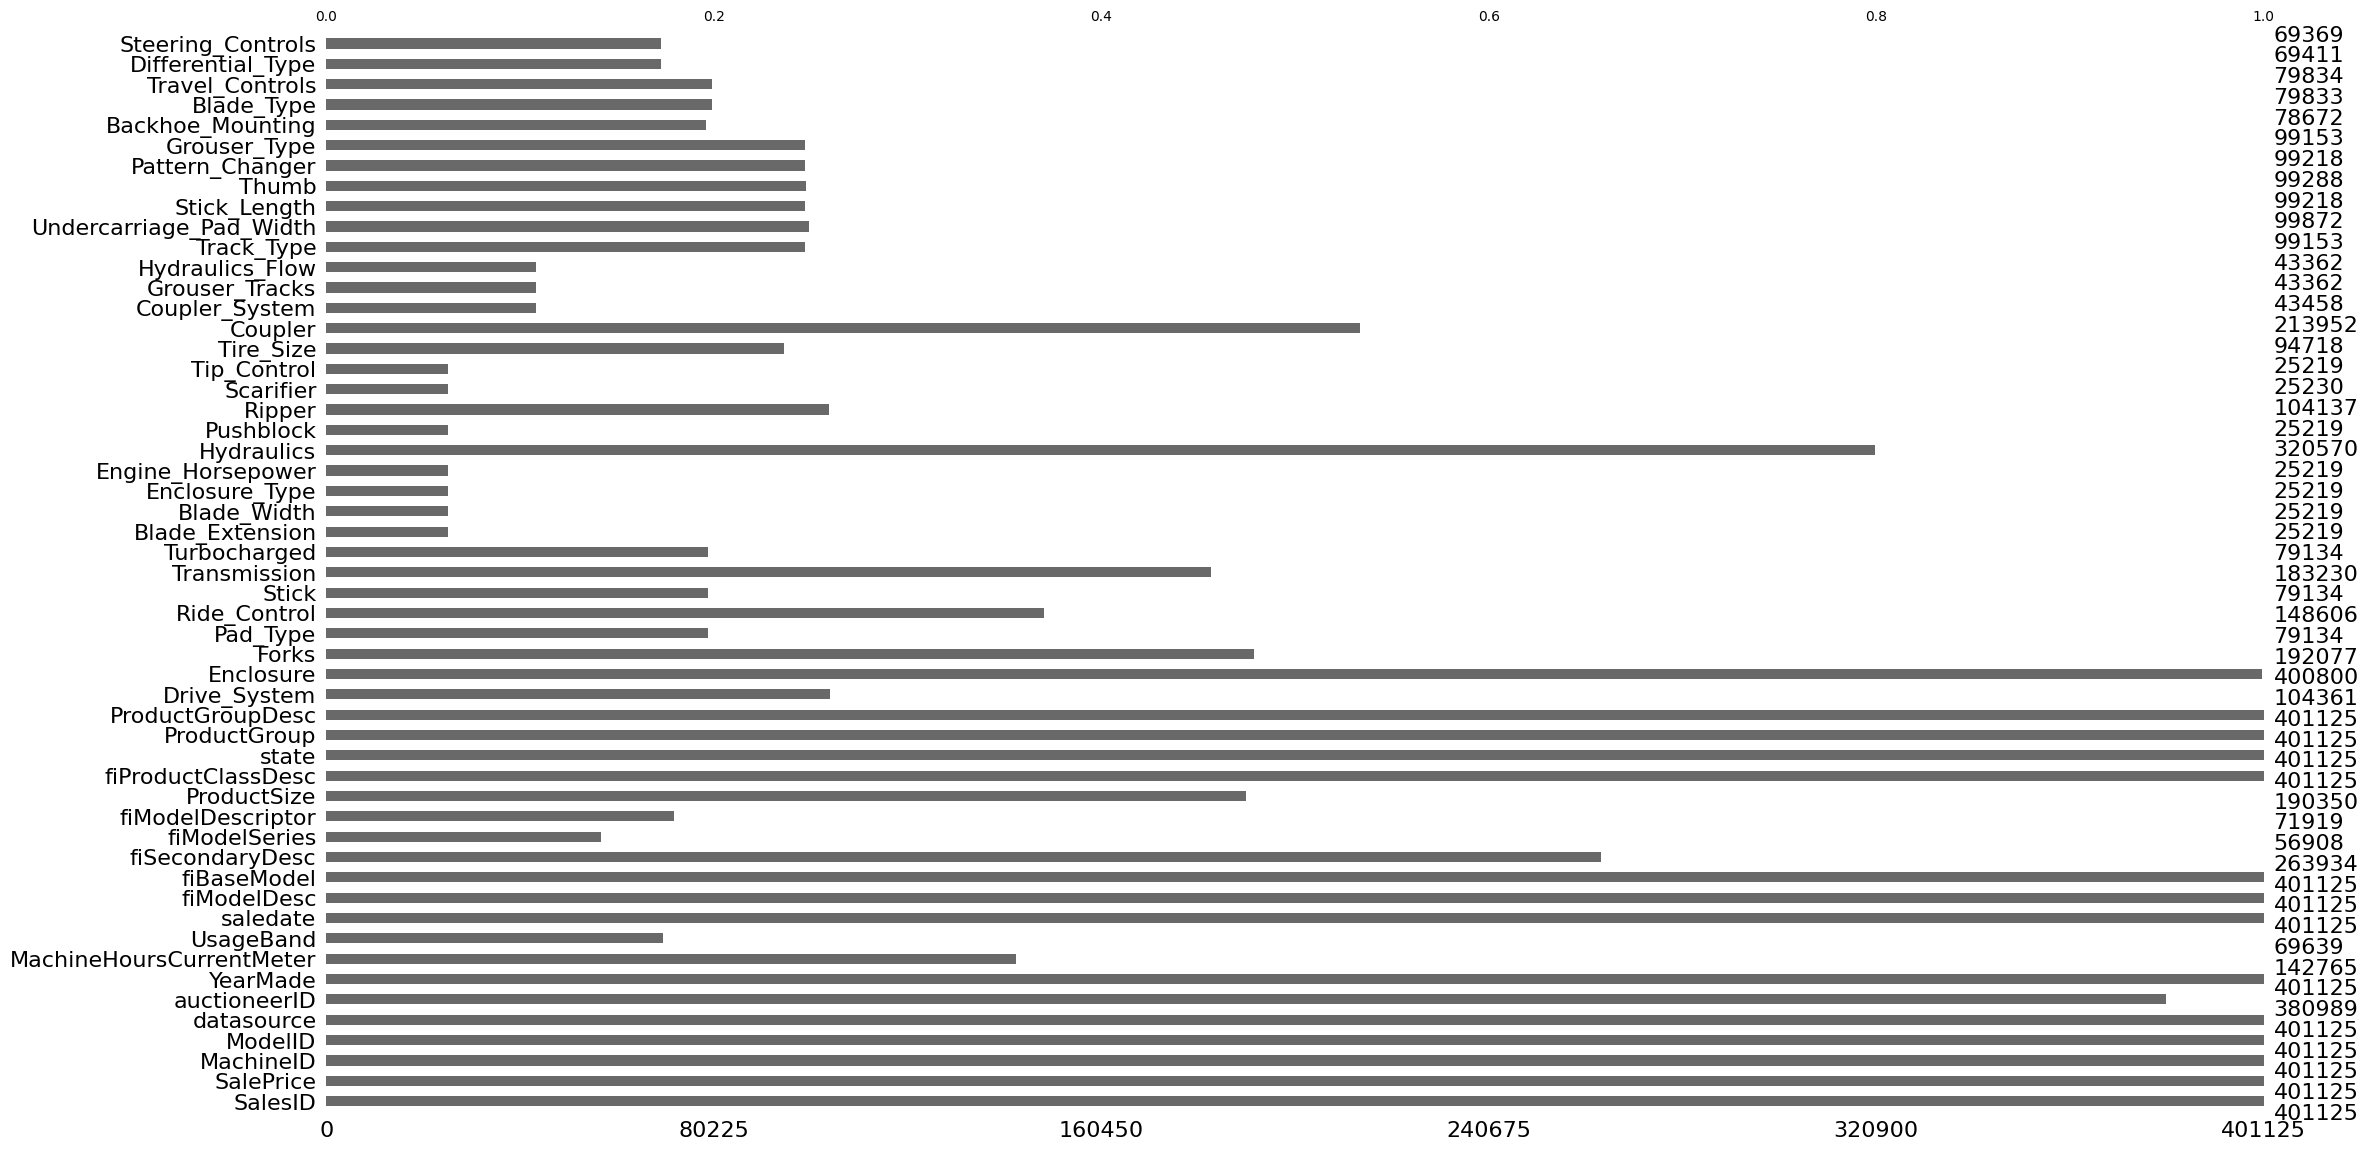

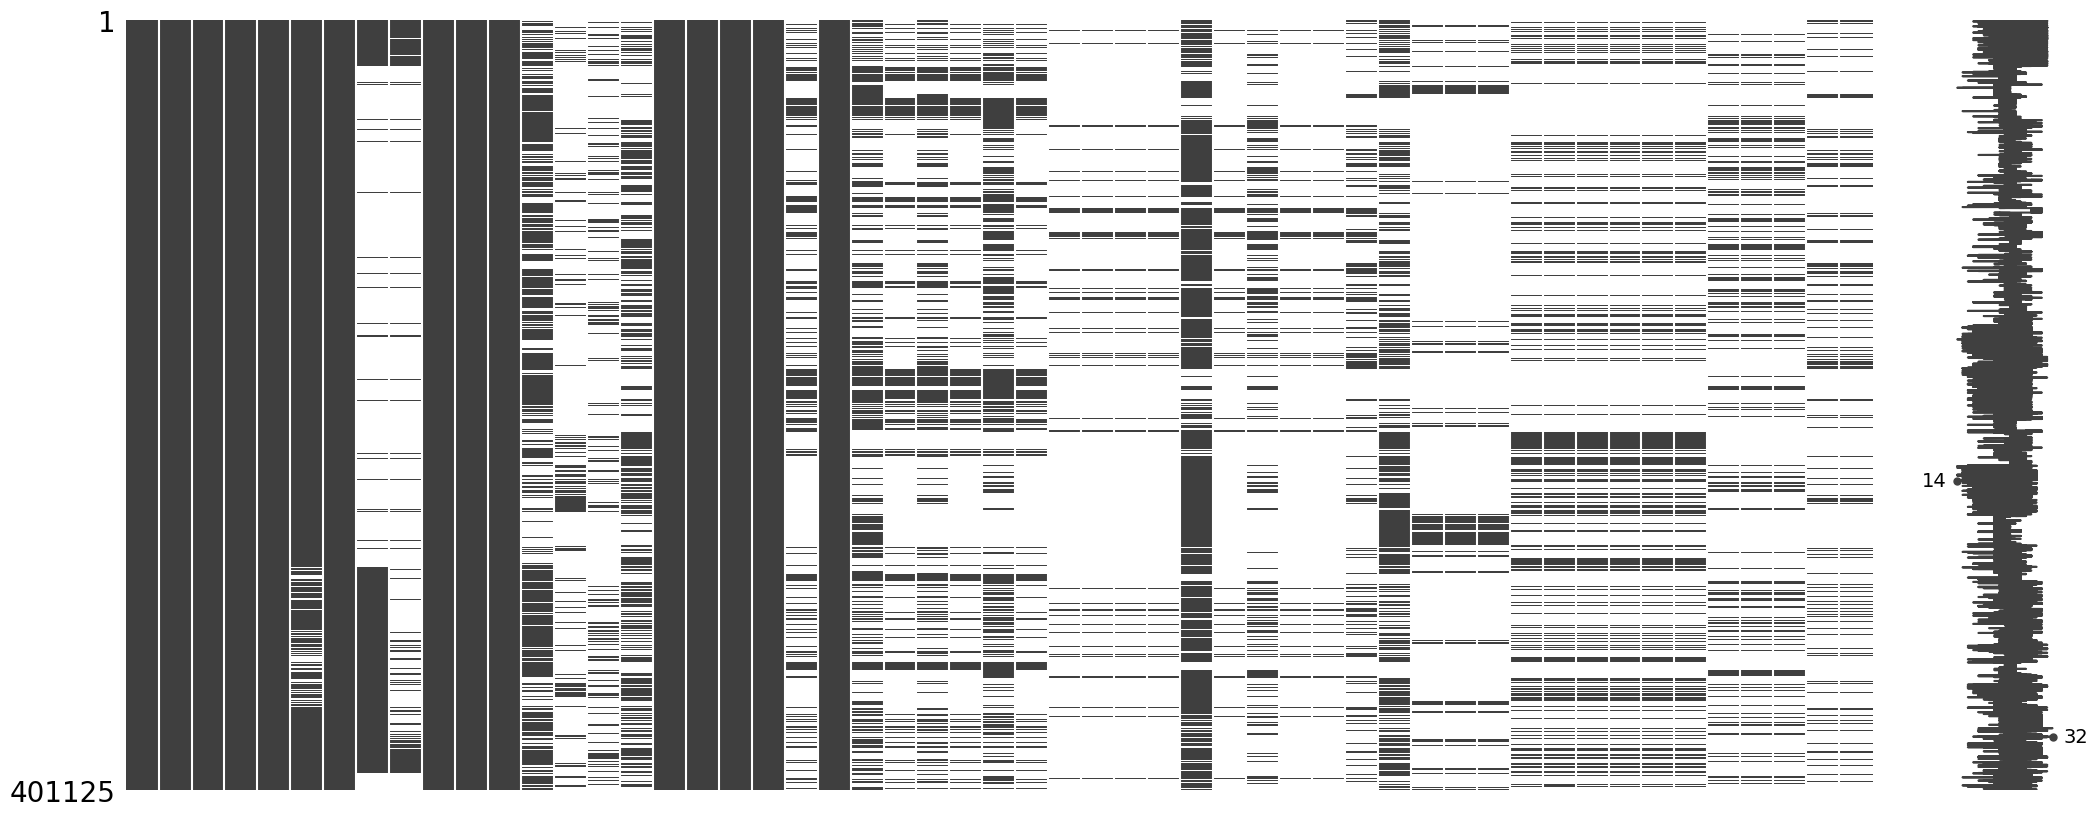

# Etapa 3: Pré-processamento dos dados

In [12]:
df_proc = pd.DataFrame()
for n,c in df.items():
    # substituindo NaN numericos pelas medianas de cada coluna
    if pd.api.types.is_numeric_dtype(c):
        df_proc[n] = c.fillna(value=c.median())
    else:
        df_proc[n] = pd.Categorical(c.astype('category').cat.as_ordered()).codes
    

# Etapa 4: Separação em X e y; Treino e teste

((389125,), (12000,))

# Etapa 5: Treinar uma floresta aleatória

CPU times: user 12min 19s, sys: 4.25 s, total: 12min 24s
Wall time: 3min 18s


,RMSE,R2
Treino,2545.333480,0.987750
Validação,7995.633856,0.891277
OOB,6866.010186,0.910867
